## 12. Apply QDA on Data 6 and Data 7.
#### (a) Plot the decision boundary.
#### (b) Assess the performance of the model.
#### (c) Plot ROC curve.
#### (d) Plot multivariate Gaussian density function corresponding to the positive & negative classes and their contours of Data 6.
#### (e) Report the values of the parameters

In [51]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import collections
from scipy.stats import multivariate_normal
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [52]:
df = pd.read_csv('data6.csv', header=None)
df[2] = df[2].replace(-1, 0)
df

,0,1,2
0,14,42,1
1,29,40,1
2,22,22,1
3,11,20,1
4,10,35,1
...,...,...,...
195,46,30,0
196,32,17,0
197,4,33,0
198,12,4,0


In [53]:
data6 = np.array(df)
np.random.shuffle(data6)
train_data = data6[:int(0.6*len(data6))]
x = dict(collections.Counter(train_data[:,-1]))
print(x)

{1: 61, 0: 59}


In [54]:
p_x = np.zeros(len(x))
for i in range (len(p_x)):
    p_x[i] = x[i]
p_x = p_x / sum(x.values())
print(p_x)

[0.49166667 0.50833333]


In [55]:
mu = np.zeros((len(x), len(train_data[0][:-1])))
for i in range(len(train_data)):
    k = int(train_data[i][-1])
    X = train_data[i][:-1]
    mu[k] += X/x[k]

print(mu)

[[25.72881356 17.33898305]
 [23.91803279 31.90163934]]


In [56]:
E = np.zeros((len(x), len(mu[0]), len(mu[0])))
for i in range(len(train_data)):
    k = int(train_data[i][-1])
    X = train_data[i][:-1]
    E[k] += ((X-mu[k]).reshape(-1, 1)*(X-mu[k])) / x[k]

print(E)

[[[304.43493249 -69.19620799]
  [-69.19620799 147.3088193 ]]

 [[145.68180597  57.79521634]
  [ 57.79521634 127.66245633]]]


In [57]:
A = np.zeros(
      (len(x) , 1 , len(mu[0]) )
)

b = np.zeros(len(x))
c = np.zeros(
      (len(x) , len(mu[0]) , len(mu[0]) )
)

for i in range(len(A)):
  c[i] = np.linalg.inv(E[i])
  A[i] = np.matmul( mu[i] , c[i] ) 
  b[i] = -0.5 * np.matmul( np.matmul(mu[i],c[i]) , mu[i].reshape(-1,1)) + np.log(p_x[i]) - 0.5*np.log(np.linalg.det(E[i]))


In [58]:
cm = np.zeros((len(x),len(x)))
test_data = data6[int(0.6*len(data6)):]
roc_data = [[],[]]
for i in range(len(test_data)):
  y = int(test_data[i][-1])
  X = test_data[i][:-1]
  delta = np.zeros(len(x))
  for i in range(len(delta)):
    delta[i] = np.matmul(A[i],X.reshape(-1,1)) + b[i] - 0.5*np.matmul( np.matmul(X,c[i]), X.reshape(-1,1))
  roc_data[0].append(y)
  roc_data[1].append(delta[1])
  cls = np.argmax(delta)
  cm[cls][y] += 1
print(cm)

[[37.  5.]
 [ 4. 34.]]


In [59]:
precision = cm[0][0] / sum(cm[0])
recall = cm[0][0] / sum(cm[:,0])
fscore = 2*precision*recall / (precision+recall)

print("Precision :",precision)
print("Recall :",recall)
print("fscore :",fscore)

Precision : 0.8809523809523809
Recall : 0.9024390243902439
fscore : 0.8915662650602411


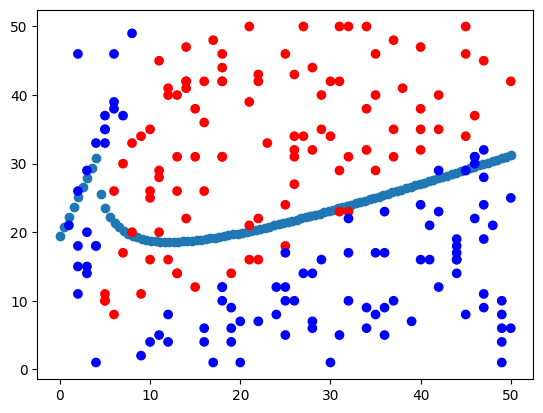

In [60]:
# Decision Boundary
p = (A[0]-A[1])[0]
q = b[0]-b[1]
r = c[0] - c[1]
x1 = np.linspace(0,50,100)
plot_data = [[],[]]
for i in range(len(x1)):
  d = -0.5*r[1][1]
  e = p[1] - x1[i]*r[1][0]
  f = p[0]*x1[i] + q -0.5*(x1[i]**2)*r[0][0]
  [x21,x22] = np.roots([d,e,f])
  # plot_data[0].append(x1[i])
  # plot_data[1].append(x21)
  plot_data[0].append(x1[i])
  plot_data[1].append(x22)

color = ["r" if i[2] == 1 else "b" for i in np.array(df)]
plt.scatter(plot_data[0],plot_data[1])
plt.scatter(np.array(df[0]),np.array(df[1]),c=color)
plt.show()

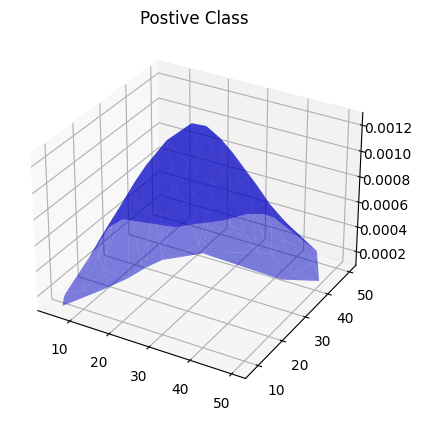

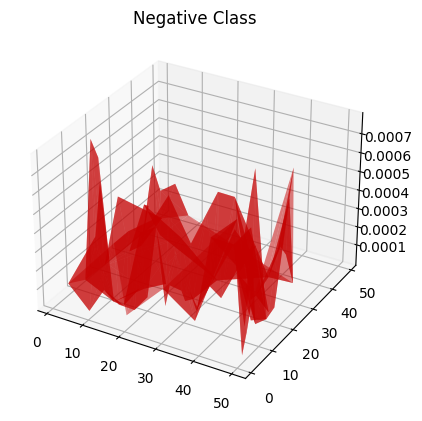

In [61]:
from scipy.stats import multivariate_normal
import seaborn as sns
x = [i[:-1] for i in data6 if i[-1] == 1 ]
y = [i[:-1] for i in data6 if i[-1] == 0 ]

fig = plt.figure()
ax =fig.add_subplot(projection='3d')

X1,X2 = ([i[0] for i in x],[i[1] for i in x])
X3 = multivariate_normal.pdf(x,mu[1],E[1])

ax.plot_trisurf(X1,X2,X3, color="b", alpha=0.5, label="Positive Class")
ax.set_title("Postive Class")
plt.show()


fig = plt.figure()
ax =fig.add_subplot(projection='3d')

Y1,Y2 = ([i[0] for i in y],[i[1] for i in y])
Y3 = multivariate_normal.pdf(x,mu[0],E[0])

ax.plot_trisurf(Y1,Y2,Y3, color="r", alpha=0.5, label="Negative Class")
ax.set_title("Negative Class")


plt.show()


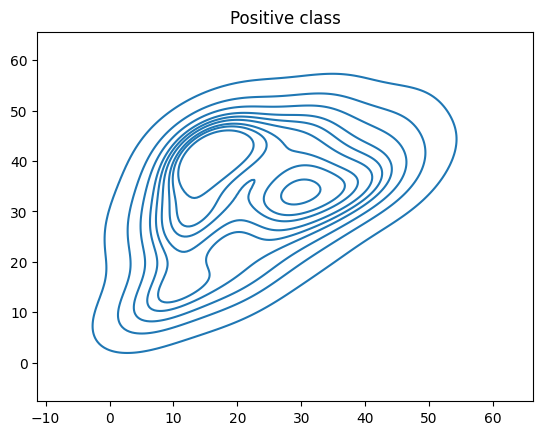

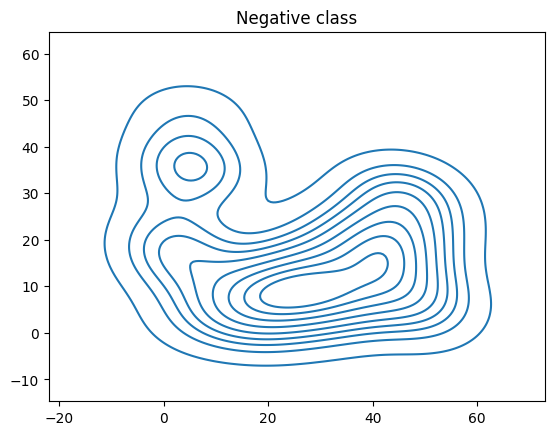

In [62]:
ax = plt.figure().gca()
sns.kdeplot(x=X1,y=X2)
ax.set_title("Positive class")
plt.show()
ax = plt.figure().gca()
sns.kdeplot(x=Y1,y=Y2)
ax.set_title("Negative class")
plt.show()

In [63]:
df = pd.read_csv("data7.csv", header=None)
df

,0,1,2
0,1.8081,-9.03440,1
1,2.3231,-8.87900,1
2,5.6168,2.07560,1
3,5.6064,-2.66200,1
4,3.2201,-4.93770,1
...,...,...,...
195,8.3921,-2.05130,0
196,7.0783,-4.20580,0
197,9.4625,-0.25960,0
198,6.3951,-0.31008,0


In [64]:
data7 = np.array(df)
np.random.shuffle(data7)
train_data = data7[:int(0.6*len(data7))]
x = dict(collections.Counter(train_data[:,-1]))
print(x)

{0.0: 60, 1.0: 60}


In [65]:
p_x = np.zeros(len(x))
for i in range (len(p_x)):
    p_x[i] = x[i]
p_x = p_x / sum(x.values())
print(p_x)

[0.5 0.5]


In [66]:
mu = np.zeros((len(x), len(train_data[0][:-1])))
for i in range(len(train_data)):
    k = int(train_data[i][-1])
    X = train_data[i][:-1]
    mu[k] += X/x[k]

print(mu)

[[ 8.19825667 -1.51569883]
 [ 0.62288253 -5.125809  ]]


In [67]:
E = np.zeros((len(x), len(mu[0]), len(mu[0])))
for i in range(len(train_data)):
    k = int(train_data[i][-1])
    X = train_data[i][:-1]
    E[k] += ((X-mu[k]).reshape(-1, 1)*(X-mu[k])) / x[k]

print(E)

[[[ 6.96180084  4.42397016]
  [ 4.42397016  5.92831416]]

 [[15.94015446  8.07005352]
  [ 8.07005352 11.51203118]]]


In [68]:
A = np.zeros(
      (len(x) , 1 , len(mu[0]) )
)

b = np.zeros(len(x))
c = np.zeros(
      (len(x) , len(mu[0]) , len(mu[0]) )
)

for i in range(len(A)):
  c[i] = np.linalg.inv(E[i])
  A[i] = np.matmul( mu[i] , c[i] ) 
  b[i] = -0.5 * np.matmul( np.matmul(mu[i],c[i]) , mu[i].reshape(-1,1)) + np.log(p_x[i]) - 0.5*np.log(np.linalg.det(E[i]))


In [69]:
cm = np.zeros((len(x),len(x)))
test_data = data7[int(0.6*len(data7)):]
roc_data = [[],[]]
for i in range(len(test_data)):
  y = int(test_data[i][-1])
  X = test_data[i][:-1]
  delta = np.zeros(len(x))
  for i in range(len(delta)):
    delta[i] = np.matmul(A[i],X.reshape(-1,1)) + b[i] - 0.5*np.matmul( np.matmul(X,c[i]), X.reshape(-1,1))
  roc_data[0].append(y)
  roc_data[1].append(delta[1])
  cls = np.argmax(delta)
  cm[cls][y] += 1
print(cm)

[[39.  2.]
 [ 1. 38.]]


In [70]:
precision = cm[0][0] / sum(cm[0])
recall = cm[0][0] / sum(cm[:,0])
fscore = 2*precision*recall / (precision+recall)

print("Precision :",precision)
print("Recall :",recall)
print("fscore :",fscore)

Precision : 0.9512195121951219
Recall : 0.975
fscore : 0.9629629629629629


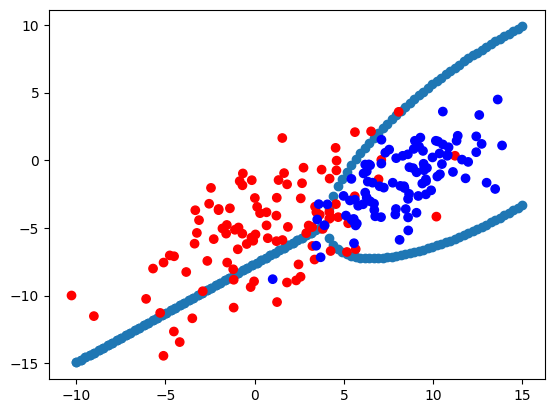

In [71]:
p = (A[0]-A[1])[0]
q = b[0]-b[1]
r = c[0] - c[1]
x1 = np.linspace(-10,15,100)
plot_data = [[],[]]
for i in range(len(x1)):
  d = -0.5*r[1][1]
  e = p[1] - x1[i]*r[1][0]
  f = p[0]*x1[i] + q -0.5*(x1[i]**2)*r[0][0]
  [x21,x22] = np.roots([d,e,f])
  plot_data[0].append(x1[i])
  plot_data[1].append(x21)
  plot_data[0].append(x1[i])
  plot_data[1].append(x22)

color = ["r" if i[2] == 1 else "b" for i in np.array(df)]
plt.scatter(plot_data[0],plot_data[1])
plt.scatter(np.array(df[0]),np.array(df[1]),c=color)
plt.show()

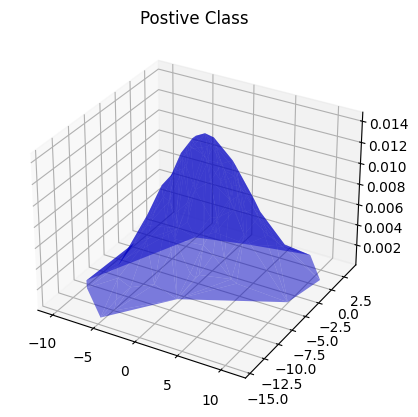

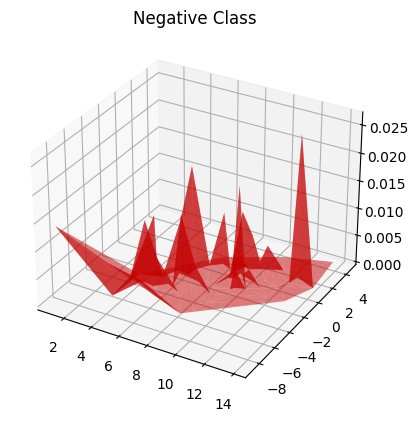

In [72]:
x = [i[:-1] for i in data7 if i[-1] == 1 ]
y = [i[:-1] for i in data7 if i[-1] == 0 ]


fig = plt.figure()
ax =fig.add_subplot(projection='3d')


X1,X2 = ([i[0] for i in x],[i[1] for i in x])
X3 = multivariate_normal.pdf(x,mu[1],E[1])

ax.plot_trisurf(X1,X2,X3, color="b", alpha=0.5, label="Positive Class")
ax.set_title("Postive Class")
plt.show()

fig = plt.figure()
ax =fig.add_subplot(projection='3d')

Y1,Y2 = ([i[0] for i in y],[i[1] for i in y])
Y3 = multivariate_normal.pdf(x,mu[0],E[0])

ax.plot_trisurf(Y1,Y2,Y3, color="r", alpha=0.5, label="Negative Class")
ax.set_title("Negative Class")
plt.show()

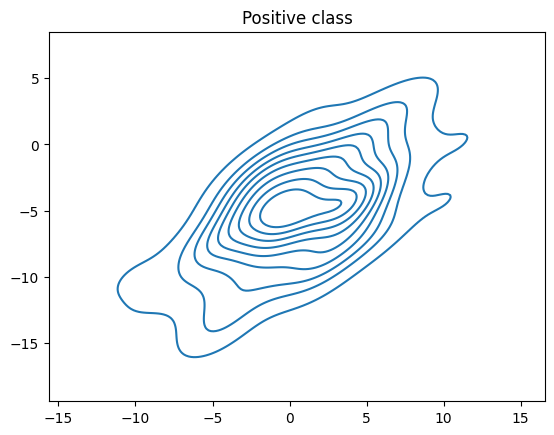

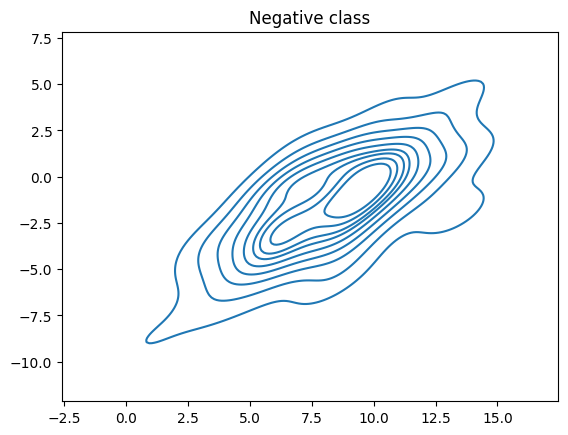

In [73]:
ax = plt.figure().gca()
sns.kdeplot(x=X1,y=X2)
ax.set_title("Positive class")
plt.show()
ax = plt.figure().gca()
sns.kdeplot(x=Y1,y=Y2)
ax.set_title("Negative class")
plt.show()

## 13. Apply multiclass QDA on Data 8.
#### (a) Plot the decision boundary between classes.
#### (b) Report the values of the parameters.
#### (c) Assess the performance of the model

In [74]:
df8 = pd.read_csv("data8.csv", header=None)
df8

,0,1,2,3
0,-9.80320,-7.75440,1.47200,1
1,-3.02640,-4.52130,2.19240,1
2,-1.48330,-6.62440,3.13420,1
3,-4.96900,-0.78348,-3.51890,1
4,-6.12240,-5.09510,0.99638,1
...,...,...,...,...
295,2.19130,-1.48810,-3.92220,3
296,-4.70710,1.70130,-1.12300,3
297,-3.52900,-5.19190,-2.59620,3
298,-0.98873,1.48270,-0.58205,3


In [75]:
data8 = np.array(df8)
np.random.shuffle(data8)
train_data = data8[:int(0.6*len(data8))]
x = dict(collections.Counter(train_data[:,-1]))
print(x)

{2.0: 52, 3.0: 69, 1.0: 59}


In [76]:
pi = np.zeros(len(x)+1)
for i in range (1, len(pi)):
    pi[i] = x[i]
pi = pi / sum(x.values())
print(pi)

[0.         0.32777778 0.28888889 0.38333333]


In [77]:
mu = np.zeros((len(x)+1, len(train_data[0][:-1])))
for i in range(len(train_data)):
    k = int(train_data[i][-1])
    X = train_data[i][:-1]
    mu[k] += X/x[k]

print(mu)

[[ 0.          0.          0.        ]
 [-4.11234237 -3.57013458  3.25752186]
 [ 4.76363096  4.56513365 -2.96054506]
 [ 0.36781725 -0.00989524 -0.41656278]]


In [78]:
E = np.zeros((len(x)+1, len(mu[0]), len(mu[0])))
for i in range(len(train_data)):
    k = int(train_data[i][-1])
    X = train_data[i][:-1]
    E[k] += ((X-mu[k]).reshape(-1, 1)*(X-mu[k])) / x[k]

print(E)

[[[ 0.          0.          0.        ]
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]]

 [[14.27904611  9.84523364  4.02834411]
  [ 9.84523364 15.16862262  1.38981268]
  [ 4.02834411  1.38981268  8.20459678]]

 [[ 7.83175566 -1.34957039 -0.34129073]
  [-1.34957039  4.60722342 -0.31034135]
  [-0.34129073 -0.31034135  5.02996859]]

 [[ 8.67227951 -1.14877067  0.307629  ]
  [-1.14877067  6.46997648  1.0248353 ]
  [ 0.307629    1.0248353   5.97029548]]]


In [79]:
A = np.zeros(
      (len(x)+1 , 1 , len(mu[0]) )
)
b = np.zeros(len(x)+1)
c = np.zeros(
      (len(x)+1 , len(mu[0]) , len(mu[0]) )
)

for i in range(1, len(A)):
    c[i] = np.linalg.inv(E[i])
    A[i] = np.matmul( mu[i] , c[i] ) 
    b[i] = -0.5 * np.matmul( np.matmul(mu[i],c[i]) , mu[i].reshape(-1,1)) + np.log(pi[i]) - 0.5*np.log(np.linalg.det(E[i]))

In [80]:
cm = np.zeros((len(x)+1,len(x)+1))
test_data = data8[int(0.6*len(data8)):]
roc_data = [[],[]]

for i in range(len(test_data)):
    y = int(test_data[i][-1])
    X = test_data[i][:-1]
    delta = np.zeros(len(x)+1)
    for i in range(1,len(delta)):
        delta[i] = np.matmul(A[i],X.reshape(-1,1)) + b[i] - 0.5*np.matmul( np.matmul(X,c[i]), X.reshape(-1,1))
    roc_data[0].append(y)
    roc_data[1].append(delta[1])
    cls = np.argmax(delta[1:]) + 1
    cm[cls][y] += 1

print(cm)

[[ 0.  0.  0.  0.]
 [ 0. 34.  0.  6.]
 [ 0.  0. 39.  2.]
 [ 0.  7.  9. 23.]]


In [81]:
precision = np.zeros(len(cm))
recall = np.zeros(len(cm))
f_score = np.zeros(len(cm))

for i in range(1,len(precision)):
  precision[i] = cm[i][i]/(sum(cm[i]))
  recall[i] = cm[i][i]/(sum(cm[:,i]))
  f_score[i] = (2*precision[i]*recall[i])/(precision[i]+recall[i])


fscore = {k:v for k,v in enumerate(f_score)}
del(fscore[0])
print("F Scores of each class are")
for k,v in fscore.items():
  print(f"Class {k} : F-score {v}")

F Scores of each class are
Class 1 : F-score 0.8395061728395061
Class 2 : F-score 0.8764044943820225
Class 3 : F-score 0.6571428571428573


In [82]:
# Decision Boundary
p = (A[2]-A[1])[0]
q = b[2]-b[1]
r = c[2] - c[1]
x1 = np.linspace(-10,15,5000)
np.random.shuffle(x1)
x2 = np.linspace(-10,15,5000)
np.random.shuffle(x2)
plot_data21 = [[],[],[]]
for i in range(len(x1)):
  d = -0.5*r[2][2]
  e = p[2] - x1[i]*r[2][0] - x2[i]*r[1][2]
  f = p[0]*x1[i] + p[1]*x2[i] + q -0.5*(x1[i]**2)*r[0][0] -x1[i]*x2[i]*r[0][1] -0.5*(x2[i]**2)*r[1][1]
  x3 = np.roots([d,e,f])
  if all(np.isreal(x3)):
    # plot_data21[0].append(x1[i])
    # plot_data21[1].append(x2[i])
    # plot_data21[2].append(x3[0])
    plot_data21[0].append(x1[i])
    plot_data21[1].append(x2[i])
    plot_data21[2].append(x3[1])

In [83]:
p = (A[3]-A[1])[0]
q = b[3]-b[1]
r = c[3] - c[1]
x1 = np.linspace(-10,15,5000)
np.random.shuffle(x1)
x2 = np.linspace(-10,15,5000)
np.random.shuffle(x2)
plot_data31 = [[],[],[]]
for i in range(len(x1)):
  d = -0.5*r[2][2]
  e = p[2] - x1[i]*r[2][0] - x2[i]*r[1][2]
  f = p[0]*x1[i] + p[1]*x2[i] + q -0.5*(x1[i]**2)*r[0][0] -x1[i]*x2[i]*r[0][1] -0.5*(x2[i]**2)*r[1][1]
  x3 = np.roots([d,e,f])
  if all(np.isreal(x3)):
    # plot_data31[0].append(x1[i])
    # plot_data31[1].append(x2[i])
    # plot_data31[2].append(x3[0])
    plot_data31[0].append(x1[i])
    plot_data31[1].append(x2[i])
    plot_data31[2].append(x3[1])

In [84]:
p = (A[3]-A[2])[0]
q = b[3]-b[2]
r = c[3] - c[2]
x1 = np.linspace(-10,15,5000)
np.random.shuffle(x1)
x2 = np.linspace(-10,15,5000)
np.random.shuffle(x2)
plot_data32 = [[],[],[]]
for i in range(len(x1)):
  d = -0.5*r[2][2]
  e = p[2] - x1[i]*r[2][0] - x2[i]*r[1][2]
  f = p[0]*x1[i] + p[1]*x2[i] + q -0.5*(x1[i]**2)*r[0][0] -x1[i]*x2[i]*r[0][1] -0.5*(x2[i]**2)*r[1][1]
  x3 = np.roots([d,e,f])
  if all(np.isreal(x3)):
    # plot_data32[0].append(x1[i])
    # plot_data32[1].append(x2[i])
    # plot_data32[2].append(x3[0])
    plot_data32[0].append(x1[i])
    plot_data32[1].append(x2[i])
    plot_data32[2].append(x3[1])

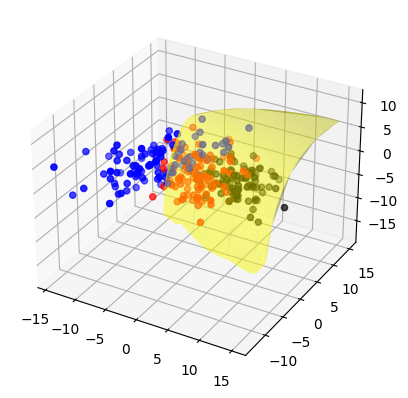

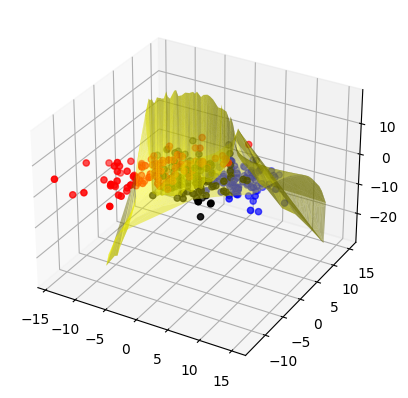

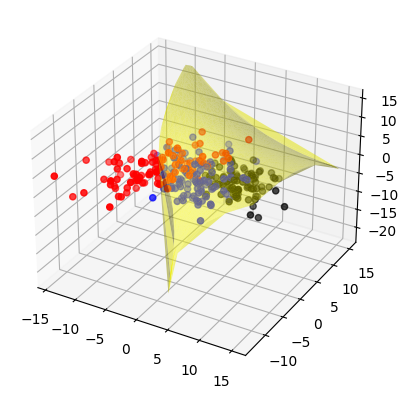

In [85]:
cc = []
for i in np.array(df8):
  if i[3] == 3:
    cc.append("r") 
  elif i[3] == 2:
    cc.append("black")
  else :
    cc.append("b")

# print(np.array(df8[0]))
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_trisurf(plot_data32[0],plot_data32[1],plot_data32[2], alpha=0.5, color="yellow")
ax.scatter3D(np.array(df8[0]),np.array(df8[1]),np.array(df8[2]),c=cc)
# ax.view_init(0,0)
plt.show()

cc = []
for i in np.array(df8):
  if i[3] == 1:
    cc.append("r") 
  elif i[3] == 3:
    cc.append("black")
  else :
    cc.append("b")
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_trisurf(plot_data31[0],plot_data31[1],plot_data31[2], alpha=0.5, color="yellow")
ax.scatter3D(np.array(df8[0]),np.array(df8[1]),np.array(df8[2]),c=cc)
# ax.view_init(30,30)
plt.show()

cc = []
for i in np.array(df8):
  if i[3] == 1:
    cc.append("r") 
  elif i[3] == 2:
    cc.append("black")
  else :
    cc.append("b")
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_trisurf(plot_data21[0],plot_data21[1],plot_data21[2], alpha=0.5, color="yellow")
ax.scatter3D(np.array(df8[0]),np.array(df8[1]),np.array(df8[2]),c=cc)
# ax.view_init(30,30)
plt.show()

## 14. Apply QDA on Ionosphere data set.
#### (a) Apply k fold and hold out cross validation techniques.
#### (b) Report the preprocessing techniques if any.
#### (c) Report the value of the performance measures used.

In [86]:
i_data = pd.read_csv("ionosphere/ionosphere.data", header=None)
i_data = i_data.drop(columns=i_data.columns[(i_data==0).all()])
i_data = i_data.drop(columns=[0])
i_data[34] = i_data[34].replace('g',1)
i_data[34] = i_data[34].replace('b',0)
i_data

,2,3,4,5,6,7,8,9,10,11,...,25,26,27,28,29,30,31,32,33,34
0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,-0.17755,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,1
1,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,0
2,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,0.05346,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,1
3,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,0
4,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,0.89391,0.13130,...,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,1
347,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,0.96510,0.03281,...,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,1
348,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,0.94124,0.01766,...,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,1
349,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,0.89724,-0.03315,...,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,1


In [87]:
#Holdout Cross Validation

ion_data = np.array(i_data)
q_fscore_rs = []
q_accuracy_rs = []
for o in range(10):
    np.random.shuffle(ion_data)
    train_data = ion_data[:int(0.66*len(ion_data))]
    test_data = ion_data[int(0.66*len(ion_data)):]
    x = dict(collections.Counter(train_data[:,-1]))
    pi = np.zeros(len(x))
    for i in range (len(pi)):
        pi[i] = x[i]
    pi = pi / sum(x.values())
    mu = np.zeros((len(x), len(train_data[0][:-1])))
    for i in range(len(train_data)):
        k = int(train_data[i][-1])
        X = train_data[i][:-1]
        mu[k] += X/x[k]
    E = np.zeros((len(x), len(mu[0]), len(mu[0])))
    for i in range(len(train_data)):
        k = int(train_data[i][-1])
        X = train_data[i][:-1]
        E[k] += ((X-mu[k]).reshape(-1, 1)*(X-mu[k])) / x[k]
    # print(E)
    
    A = np.zeros(
          (len(x), 1 , len(mu[0]) )
    )
    b = np.zeros(len(x))
    c = np.zeros(
          (len(x) , len(mu[0]) , len(mu[0]) )
    )
    for i in range(len(A)):
        c[i] = np.linalg.inv(E[i])
        A[i] = np.matmul( mu[i] , c[i] ) 
        b[i] = -0.5 * np.matmul( np.matmul(mu[i],c[i]) , mu[i].reshape(-1,1)) + np.log(pi[i]) - 0.5*np.log(np.linalg.det(E[i]))
    
    cm = np.zeros((len(x), len(x)))
    for i in range(len(test_data)):
        y = int(test_data[i][-1])
        X = test_data[i][:-1]
        delta = np.zeros(len(x))
        for i in range(len(delta)):
            delta[i] = np.matmul(A[i],X.reshape(-1,1)) + b[i] - 0.5*np.matmul( np.matmul(X,c[i]), X.reshape(-1,1))
        cls = np.argmax(delta)
        cm[cls][y] += 1
    precision = cm[0][0] / sum(cm[0])
    recall = cm[0][0] / sum(cm[:,0])
    fscore = (2*precision*recall) / (precision+recall)
    q_fscore_rs.append(fscore)
    q_accuracy_rs.append((cm[0][0]+cm[1][1])/len(test_data))

print(q_fscore_rs)
print(q_accuracy_rs)



[0.8712871287128713, 0.8235294117647058, 0.8076923076923076, 0.7777777777777777, 0.8571428571428572, 0.7889908256880733, 0.8837209302325582, 0.7708333333333334, 0.75, 0.8571428571428571]
[0.8916666666666667, 0.85, 0.8333333333333334, 0.8, 0.8833333333333333, 0.8083333333333333, 0.9166666666666666, 0.8166666666666667, 0.8166666666666667, 0.8916666666666667]


In [88]:
# K-Fold Cross Validation
ion_data = np.array(i_data)
q_fscore_kf = []
q_accuracy_kf = []
for kf in range(10):
    data_length = (len(ion_data)/10)
    train_data = np.concatenate((ion_data[:int(kf*data_length)],ion_data[int((kf+1)*data_length):]))
    test_data = ion_data[int(kf*data_length):int((kf+1)*data_length)]
    x = dict(collections.Counter(train_data[:,-1]))
    pi = np.zeros(len(x))
    for i in range (len(pi)):
        pi[i] = x[i]
    pi = pi / sum(x.values())
    mu = np.zeros((len(x), len(train_data[0][:-1])))
    for i in range(len(train_data)):
        k = int(train_data[i][-1])
        X = train_data[i][:-1]
        mu[k] += X/x[k]
    E = np.zeros((len(x), len(mu[0]), len(mu[0])))
    for i in range(len(train_data)):
        k = int(train_data[i][-1])
        X = train_data[i][:-1]
        E[k] += ((X-mu[k]).reshape(-1, 1)*(X-mu[k])) / x[k]
    A = np.zeros(
          (len(x), 1 , len(mu[0]) )
    )
    b = np.zeros(len(x))
    c = np.zeros(
          (len(x) , len(mu[0]) , len(mu[0]) )
    )
    for i in range(len(A)):
        c[i] = np.linalg.inv(E[i])
        A[i] = np.matmul( mu[i] , c[i] ) 
        b[i] = -0.5 * np.matmul( np.matmul(mu[i],c[i]) , mu[i].reshape(-1,1)) + np.log(pi[i]) - 0.5*np.log(np.linalg.det(E[i]))
    
    cm = np.zeros((len(x), len(x)))
    for i in range(len(test_data)):
        y = int(test_data[i][-1])
        X = test_data[i][:-1]
        delta = np.zeros(len(x))
        for i in range(len(delta)):
            delta[i] = np.matmul(A[i],X.reshape(-1,1)) + b[i] - 0.5*np.matmul( np.matmul(X,c[i]), X.reshape(-1,1))
        cls = np.argmax(delta)
        cm[cls][y] += 1
    precision = cm[0][0] / sum(cm[0])
    recall = cm[0][0] / sum(cm[:,0])
    fscore = (2*precision*recall) / (precision+recall)
    q_fscore_kf.append(fscore)
    q_accuracy_kf.append((cm[0][0]+cm[1][1])/len(test_data))

print(q_fscore_kf)
print(q_accuracy_kf)


[0.8888888888888888, 0.878048780487805, 0.9189189189189189, 0.8717948717948718, 0.75, 0.8648648648648648, 0.8648648648648649, 0.888888888888889, nan, nan]
[0.8857142857142857, 0.8571428571428571, 0.9142857142857143, 0.8571428571428571, 0.7714285714285715, 0.8571428571428571, 0.8571428571428571, 0.9714285714285714, 0.9428571428571428, 0.8888888888888888]


In [89]:
# MER - Mean Error Rate
Q_MER_RS = 1-np.array(q_accuracy_rs)
Q_MER_KF = 1-np.array(q_accuracy_kf) 

print(Q_MER_RS)
print(Q_MER_KF)

[0.10833333 0.15       0.16666667 0.2        0.11666667 0.19166667
 0.08333333 0.18333333 0.18333333 0.10833333]
[0.11428571 0.14285714 0.08571429 0.14285714 0.22857143 0.14285714
 0.14285714 0.02857143 0.05714286 0.11111111]


In [90]:
# AMER - Average Mean Error Rate
Q_AMER_RS = np.sum(Q_MER_RS)/10
Q_AMER_KF = np.sum(Q_MER_KF)/10
print(Q_AMER_RS)
print(Q_AMER_KF)

0.14916666666666667
0.11968253968253972


## 16. Apply multiclass QDA on Abalone Data Set.
#### (a) Explain the experimental procedure.
#### (b) Report the values of the parameters.
#### (c) Write report on the results obtained

In [91]:
abalone = pd.read_csv("abalone/abalone.data", header=None)
abalone[0] = abalone[0].replace('M',1)
abalone[0] = abalone[0].replace('F',2)
abalone[0] = abalone[0].replace('I',3)
abalone = abalone.rename(columns={8:"y"})
abalone

,0,1,2,3,4,5,6,7,y
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,3,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,2,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,1,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,1,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,2,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [92]:
counts = dict(abalone["y"].value_counts())
index = []
for i in counts.keys():
  if counts[i] < 100:
    index.append(i)
index

[16, 17, 4, 18, 19, 20, 3, 21, 23, 22, 27, 24, 1, 26, 29, 2, 25]

In [93]:
abalone = abalone[abalone.y > 4]
abalone = abalone[abalone.y < 16]
counts = dict(abalone["y"].value_counts())
print(counts)
sorted(counts.keys())

{9: 689, 10: 634, 8: 568, 11: 487, 7: 391, 12: 267, 6: 259, 13: 203, 14: 126, 5: 115, 15: 103}


[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [94]:
abalone["y"] = (abalone["y"] - 5) 
abalone

,0,1,2,3,4,5,6,7,y
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,10
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,2
2,2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,4
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,5
4,3,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,2
...,...,...,...,...,...,...,...,...,...
4172,2,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,6
4173,1,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,5
4174,1,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,4
4175,2,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,5


In [95]:
#Rnadom Sampling
abalone_data = np.array(abalone)
q_accuracy_rs = []
for o in range(10):
    np.random.shuffle(abalone_data)
    train_data = abalone_data[:int(0.8*len(abalone_data))]
    test_data = abalone_data[int(0.8*len(abalone_data)):]
    x = dict(collections.Counter(train_data[:,-1]))
    # print(x)
    l = len(x)
    pi = np.zeros(l)
    for i in range (len(pi)):
        # print(x[i])
        pi[i] = x[i]
    pi = pi / sum(x.values())
    mu = np.zeros((l, len(train_data[0][:-1])))
    for i in range(len(train_data)):
        k = int(train_data[i][-1])
        X = train_data[i][:-1]
        mu[k] += X/x[k]
    E = np.zeros((l, len(mu[0]), len(mu[0])))
    for i in range(len(train_data)):
        k = int(train_data[i][-1])
        X = train_data[i][:-1]
        E[k] += ((X-mu[k]).reshape(-1, 1)*(X-mu[k])) / x[k]
    A = np.zeros(
          (l, 1 , len(mu[0]) )
    )
    b = np.zeros(l)
    c = np.zeros(
          (l , len(mu[0]) , len(mu[0]) )
    )
    for i in range(len(A)):
        c[i] = np.linalg.inv(E[i])
        A[i] = np.matmul( mu[i] , c[i] ) 
        b[i] = -0.5 * np.matmul( np.matmul(mu[i],c[i]) , mu[i].reshape(-1,1)) + np.log(pi[i]) - 0.5*np.log(np.linalg.det(E[i]))
    
    cm = np.zeros((l, l))
    for i in range(len(test_data)):
        y = int(test_data[i][-1])
        X = test_data[i][:-1]
        delta = np.zeros(l)
        for i in range(len(delta)):
            delta[i] = np.matmul(A[i],X.reshape(-1,1)) + b[i] - 0.5*np.matmul( np.matmul(X,c[i]), X.reshape(-1,1))
        cls = np.argmax(delta)

        cm[cls][y] += 1
    accuracy = 0
    for i in range(len(cm)):
      accuracy += cm[i][i]
    accuracy = accuracy/len(test_data)
    q_accuracy_rs.append(accuracy)

print(q_accuracy_rs)       

[0.23797139141742524, 0.247074122236671, 0.2613784135240572, 0.23667100130039012, 0.24057217165149544, 0.2483745123537061, 0.21716514954486346, 0.23797139141742524, 0.2613784135240572, 0.247074122236671]


In [96]:
cm

array([[14., 18.,  9.,  4.,  2.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 3.,  5.,  8.,  3.,  1.,  3.,  1.,  0.,  0.,  0.,  0.],
       [ 4., 29., 43., 46., 35., 18.,  5.,  1.,  1.,  2.,  2.],
       [ 0.,  2.,  4., 11.,  5.,  4.,  5.,  3.,  0.,  0.,  1.],
       [ 0.,  0., 11., 39., 69., 60., 36., 19.,  4.,  2.,  4.],
       [ 0.,  0.,  0.,  4., 19., 18., 15., 11.,  8.,  7.,  3.],
       [ 0.,  0.,  1.,  5., 11., 16., 22., 15.,  7.,  3.,  5.],
       [ 0.,  0.,  0.,  3.,  0.,  5.,  8.,  2.,  5.,  1.,  2.],
       [ 0.,  0.,  0.,  0.,  1.,  5.,  3.,  2.,  3.,  0.,  2.],
       [ 0.,  0.,  1.,  0.,  0.,  2.,  2.,  1.,  0.,  1.,  2.],
       [ 0.,  0.,  0.,  0.,  0.,  3.,  1.,  1.,  2.,  2.,  2.]])

In [97]:
precision = np.zeros(len(cm))
recall = np.zeros(len(cm))
f_score = np.zeros(len(cm))

for i in range(1,len(precision)):
  precision[i] = cm[i][i]/(sum(cm[i]))
  recall[i] = cm[i][i]/(sum(cm[:,i]))
  f_score[i] = (2*precision[i]*recall[i])/(precision[i]+recall[i])
fscore = {k:v for k,v in enumerate(f_score)}
del(fscore[0])
print("F Scores of each class are")
for k,v in fscore.items():
  print(f"Class {k} : F-score {v}")

F Scores of each class are
Class 1 : F-score 0.1282051282051282
Class 2 : F-score 0.32699619771863114
Class 3 : F-score 0.14666666666666667
Class 4 : F-score 0.3565891472868216
Class 5 : F-score 0.16438356164383564
Class 6 : F-score 0.2404371584699454
Class 7 : F-score 0.04878048780487805
Class 8 : F-score 0.13043478260869568
Class 9 : F-score 0.07407407407407407
Class 10 : F-score 0.1176470588235294


In [98]:
# MER - Mean Error Rate
Q_MER_RS = 1-np.array(q_accuracy_rs)
print(Q_MER_RS)

# AMER - Average Mean Error Rate
Q_AMER_RS = np.sum(Q_MER_RS)/10
print(Q_AMER_RS)

[0.76202861 0.75292588 0.73862159 0.763329   0.75942783 0.75162549
 0.78283485 0.76202861 0.73862159 0.75292588]
0.7564369310793237
